In [12]:
import tensorflow as tf
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
tf.keras.preprocessing.image.load_img
tf.keras.preprocessing.image.img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense

from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop



import os
import numpy as np
import pandas as np

import matplotlib.pyplot as plt
%matplotlib inline


In [13]:
DATASET_DIR = "/home/pritish/Downloads/Intel/Training_Project_1/dataset"

IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 25
BATCH_SIZE = 8


In [14]:
os.listdir(DATASET_DIR)

['covid', 'normal']

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#model.compile(Adam(lr=0.0001),loss="binary_crossentropy", metrics=["accuracy"])


In [17]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

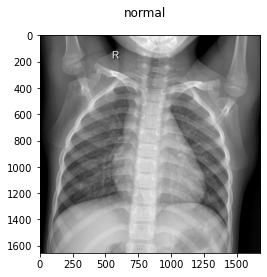

In [18]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[4], cmap='gray') 


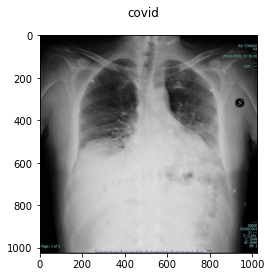

In [19]:
covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[3], cmap='gray') 


In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, # same directory as training data
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)


Found 59 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


/tmp/ipykernel_3456/135549030.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
7/7 [==============================] - 5s 482ms/step - loss: 1.0810 - accuracy: 0.5882 - val_loss: 0.6318 - val_accuracy: 0.7188
Epoch 2/25
7/7 [==============================] - 3s 470ms/step - loss: 0.7604 - accuracy: 0.5882 - val_loss: 0.6306 - val_accuracy: 0.7812
Epoch 3/25
7/7 [==============================] - 3s 507ms/step - loss: 0.5541 - accuracy: 0.7647 - val_loss: 0.4602 - val_accuracy: 0.8750
Epoch 4/25
7/7 [==============================] - 3s 465ms/step - loss: 0.2655 - accuracy: 0.9216 - val_loss: 0.4623 - val_accuracy: 0.8750
Epoch 5/25
7/7 [==============================] - 3s 490ms/step - loss: 0.2596 - accuracy: 0.9020 - val_loss: 0.2308 - val_accuracy: 0.9062
Epoch 6/25
7/7 [==============================] - 3s 497ms/step - loss: 0.2692 - accuracy: 0.8431 - val_loss: 0.1246 - val_accuracy: 0.9375
Epoch 7/25
7/7 [==============================] - 3s 526ms/step - loss: 0.1653 - accuracy: 0.9216 - val_loss: 0.3434 - val_accuracy: 0.8438
Epoch 8/25
7/7 [====

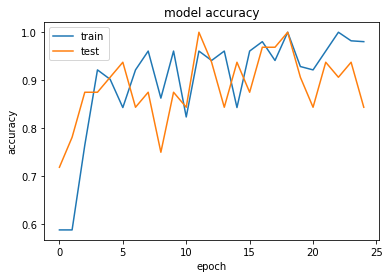

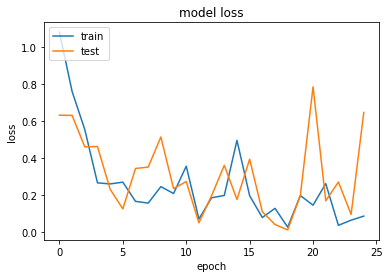

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()